In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pm4py.objects.petri_net.timed_arc_net import obj, semantics
from pm4py.objects.petri_net.utils import petri_utils as pn_utils
from pm4py.objects.petri_net import properties
from pm4py.visualization.petri_net import visualizer as pn_viz

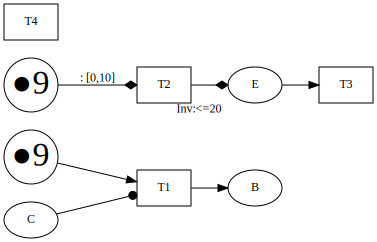

In [3]:
pn = obj.TimedArcNet()
tm = obj.TimedMarking()
place_A = pn_utils.add_place(pn,'A')
place_B = pn_utils.add_place(pn,'B')
place_C = pn_utils.add_place(pn,'C')
place_D = pn_utils.add_place(pn,'D')
place_E = pn_utils.add_place(pn,'E')
trans_1 = pn_utils.add_transition(pn,'T1','T1')
trans_2 = pn_utils.add_transition(pn,'T2','T2')
trans_3 = pn_utils.add_transition(pn,'T3','T3')
trans_4 = pn_utils.add_transition(pn,'T4','T4')
pn_utils.add_arc_from_to(place_E,trans_3,pn)
pn_utils.add_arc_from_to(place_A,trans_1,pn)
pn_utils.add_arc_from_to(trans_1,place_B,pn)
pn_utils.add_arc_from_to(place_C,trans_1,pn,type=properties.INHIBITOR_ARC)
tm[place_A] = 1
tm[place_D] = 1
tm.timed_dict[place_A] = 0
tm.timed_dict[place_D] = 0
p_to_t = pn_utils.add_arc_from_to(place_D,trans_2,pn,type=properties.TRANSPORT_ARC)
t_to_p = pn_utils.add_arc_from_to(trans_2,place_E,pn,type=properties.TRANSPORT_ARC)
p_to_t.properties[properties.AGE_MAX] = 10
p_to_t.properties[properties.TRANSPORT_INDEX] = 0
t_to_p.properties[properties.TRANSPORT_INDEX] = 0
place_E.properties[properties.AGE_INVARIANT] = 20
tm.time_step(9)
pn_viz.apply(pn,tm,parameters={'debug':True})

In [4]:
ntm = semantics.execute(trans_1,pn,tm)
print(ntm)
ntm = semantics.execute(trans_2,pn,ntm)
print(ntm)

['B:1', 'D:1'] {A: 9, D: 9}
['B:1', 'E:1'] {A: 9, E: 9}


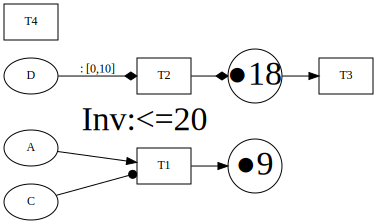

In [12]:
pn_viz.apply(pn,ntm,parameters={'debug':True})

In [9]:
semantics.time_step(9,pn,ntm)

False